In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = '../Data/cleanedData/cleaned_data.csv'
data = pd.read_csv(data_path)
area_name = 'Hà Nội'

In [3]:
if area_name != 'Hà Nội':
    area = data[data['Quận/Huyện'] == area_name]
else:
    area = data

In [4]:
month_price_path = '../Data/priceData/month_price.csv'
quarter_price_path = '../Data/priceData/quarter_price.csv'

In [5]:
month_prices = pd.read_csv(month_price_path)
quarter_prices = pd.read_csv(quarter_price_path)

month_prices.shape

(135, 26)

In [6]:
columns = 'Giá T10/22,Giá T11/22,Giá T12/22,Giá T1/23,Giá T2/23,Giá T3/23,Giá T4/23,Giá T5/23,Giá T6/23,Giá T7/23,Giá T8/23,Giá T9/23,Giá T10/23,Giá T11/23,Giá T12/23,Giá T1/24,Giá T2/24,Giá T3/24,Giá T4/24,Giá T5/24,Giá T6/24,Giá T7/24,Giá T8/24,Giá T9/24,Giá T10/24'
prices = pd.DataFrame(columns=columns.split(','))
quarter_to_months = {
    'Giá Q4/22': ['Giá T10/22', 'Giá T11/22', 'Giá T12/22'],
    'Giá Q1/23': ['Giá T1/23', 'Giá T2/23', 'Giá T3/23'],
    'Giá Q2/23': ['Giá T4/23', 'Giá T5/23', 'Giá T6/23'],
    'Giá Q3/23': ['Giá T7/23', 'Giá T8/23', 'Giá T9/23'],
    'Giá Q4/23': ['Giá T10/23', 'Giá T11/23', 'Giá T12/23'],
    'Giá Q1/24': ['Giá T1/24', 'Giá T2/24', 'Giá T3/24'],
    'Giá Q2/24': ['Giá T4/24', 'Giá T5/24', 'Giá T6/24'],
    'Giá Q3/24': ['Giá T7/24', 'Giá T8/24', 'Giá T9/24', 'Giá T10/24']
}

In [7]:
def change_quarter_to_month(quarter_row):
    result = pd.DataFrame(columns=columns.split(','))
    for quarter, months in quarter_to_months.items():
        if quarter in quarter_row:
            for month in months:
                result[month] = quarter_row[quarter]
    
    return result


In [8]:
for index, row in area.iterrows():
    if row['Mã lịch sử giá'] == 'M':
        matching_row = month_prices[month_prices['index'] == index].drop(columns=['index'])
        if not matching_row.empty:
            prices = pd.concat([prices, matching_row], ignore_index=True)
    if row['Mã lịch sử giá'] == 'Q':
        matching_row = quarter_prices[quarter_prices['index'] == index].drop(columns=['index'])
        if not matching_row.empty:
            prices = pd.concat([prices, change_quarter_to_month(matching_row)], ignore_index=True)

In [9]:
import numpy as np
import pandas as pd

# less mean max
less = []
mean = []
max = []
mean_price = pd.DataFrame(columns=prices.columns)

for col in prices.columns:
    less.clear()
    mean.clear()
    max.clear()
    for row in prices[col]:
        if isinstance(row, str):
            row_values = row.split()
            less.append(float(row_values[0]))
            mean.append(float(row_values[1]))
            max.append(float(row_values[2]))

    mean_price[col] = [round(np.mean(less), 2), round(np.mean(mean), 2), round(np.mean(max), 2)]


In [ ]:
import json

output_json_path = "../Data/HighchartsProject/mean_price.json"

mean_price['area'] = [area_name]*3
# Ghi dữ liệu DataFrame vào tệp JSON
mean_price.to_json(output_json_path, orient="records", indent=4)

In [13]:
import sys
sys.path.append('../Prediction') 
mean_price.drop(columns=['area'], inplace=True)
import model

d:\Univercity\Python\Laptrinhxuly\three-businessmans\VisualizationData\../Prediction\model.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


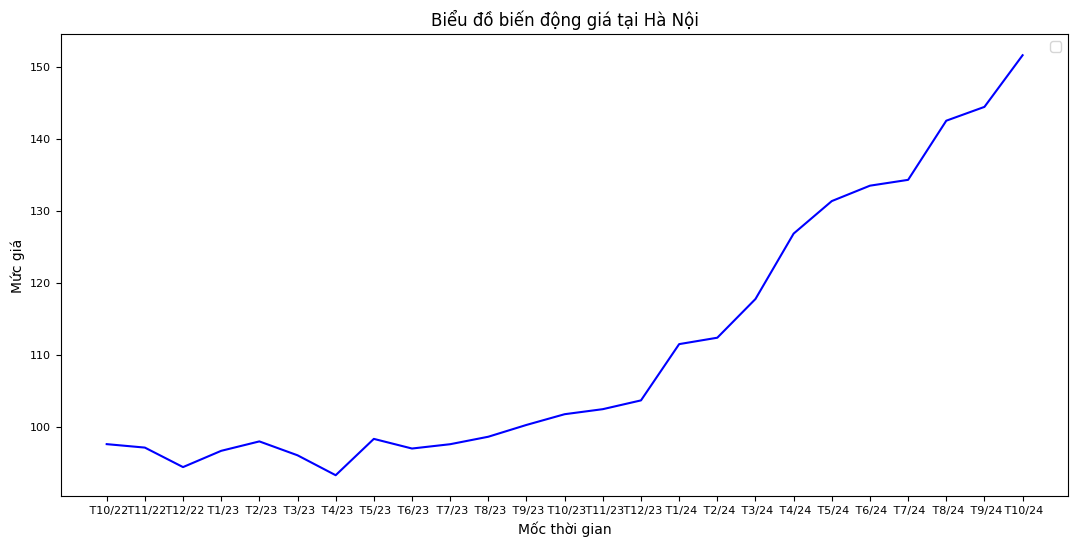

d:\Univercity\Python\Laptrinhxuly\three-businessmans\VisualizationData\../Prediction\model.py:62: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
d:\Univercity\Python\Laptrinhxuly\three-businessmans\VisualizationData\../Prediction\model.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


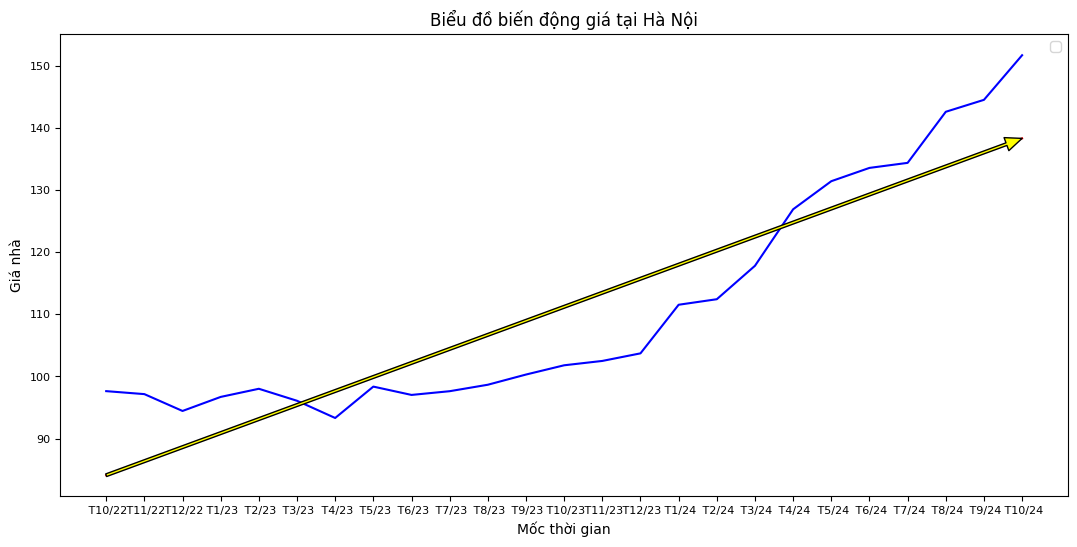

In [14]:
from model import Predictor

predictor = Predictor(area_name, mean_price.columns.str.replace('Giá', ""), mean_price.loc[1,:])

predictor.show()